<a href="https://colab.research.google.com/github/berkayberatsonmez/Image_Processing/blob/main/Histogram_Denkle%C5%9Ftirme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rd
import pandas as pd

In [ ]:
print("Enter pixel width size: ")
pixel_width = int(input())
print("Enter pixel height size: ")
pixel_height = int(input())
MN = pixel_height * pixel_width
print("MN:",MN)

Enter pixel width size: 
64
Enter pixel height size: 
64
MN: 4096


In [ ]:
print("Enter bit size: ")
bit = int(input())
bit = 2 ** bit
print("L:", bit)

Enter bit size: 
3
L: 8


In [ ]:
rk = []
for i in range(bit):
    rk.append(i)
rk

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
nk = []
for i in range(bit):
    if bit == 1:
        nk.append(MN)
    else:
        nk_value = rd.randint(0,(MN - bit))
        nk.append(nk_value)
        MN = MN - nk_value
        bit = bit - 1
nk

[2213, 239, 1177, 155, 98, 85, 19, 110]

In [ ]:
histogram = dict(zip(rk,nk))
histogram

{0: 2213, 1: 239, 2: 1177, 3: 155, 4: 98, 5: 85, 6: 19, 7: 110}

In [ ]:
#pr(rk) = nk/MN
pr_rk = []
for i in range(len(nk)):
    pr = nk[i] / (pixel_height * pixel_width)
    pr_rk.append(pr)
pr_rk

[0.540283203125,
 0.058349609375,
 0.287353515625,
 0.037841796875,
 0.02392578125,
 0.020751953125,
 0.004638671875,
 0.02685546875]

In [ ]:
df = pd.DataFrame(
    {'rk': rk,
     'nk': nk,
     'pr(rk) = nk/MN': pr_rk
    }).set_index('rk')
df

,nk,pr(rk) = nk/MN
rk,,
0,2213,0.540283
1,239,0.058350
2,1177,0.287354
3,155,0.037842
4,98,0.023926
5,85,0.020752
6,19,0.004639
7,110,0.026855


In [ ]:
s = []
for i in range(len(pr_rk)):

    T_r = (len(pr_rk) - 1) * sum(pr_rk[:i + 1])
    s.append(T_r)
s

[3.781982421875,
 4.1904296875,
 6.201904296875,
 6.466796875,
 6.63427734375,
 6.779541015625,
 6.81201171875,
 7.0]

In [ ]:
s_numbers = dict(zip(rk,s))
s_numbers

{0: 3.781982421875,
 1: 4.1904296875,
 2: 6.201904296875,
 3: 6.466796875,
 4: 6.63427734375,
 5: 6.779541015625,
 6: 6.81201171875,
 7: 7.0}

In [ ]:
ps_sk = []
for i in range(len(s)):
    rounded = round(s[i])
    ps_sk.append(rounded)
ps_sk

[4, 4, 6, 6, 7, 7, 7, 7]

In [ ]:
sk = []
count = 0
for i in range(0,len(ps_sk) - 1):
    if ps_sk[i] == ps_sk[i + 1]:
        count += 1
        sk.append(0)
    else:
        sk.append(sum(pr_rk[i-count:i + 1]))
        count = 0
sk.append(sum(pr_rk[len(ps_sk)-count - 1:len(ps_sk)]))        
sk

[0, 0.5986328125, 0, 0.3251953125, 0, 0, 0, 0.076171875]

In [ ]:
import matplotlib.pyplot as plt

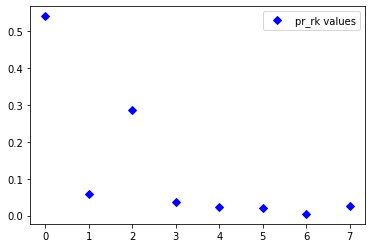

In [ ]:
plt.plot(rk, pr_rk, 'bD', label='pr_rk values')
plt.legend()
plt.show()

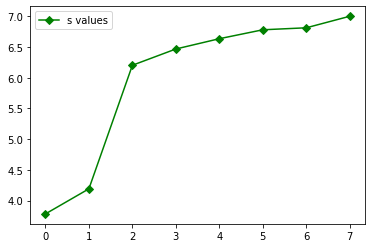

In [ ]:
plt.plot(rk, s, '-gD', label='s values')
plt.legend()
plt.show()

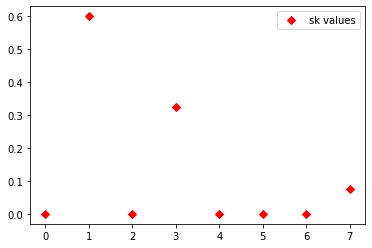

In [ ]:
plt.plot(rk, sk, 'rD', label='sk values')
plt.legend()
plt.show()